In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 

In [667]:
df = pd.read_csv('mechanical_fitting_failures_2011_2018-03.csv', parse_dates=True)
df.head()

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,SECOND_PIPE_MATERIAL_OTHER,SECOND_PIPE_PLASTIC_TEXT,SECOND_PIPE_PLASTIC_OTHER,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR
0,4/3/2018,7100.1-2 10-2014,1209,2018,20180227120985471,85414,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00028186
1,4/3/2018,7100.1-2 10-2014,1209,2018,20180219120985470,85413,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,POLYETHYLENE (PE),NaN,CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY,00028008
2,4/3/2018,7100.1-2 10-2014,1209,2018,20180216120985468,85411,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027950
3,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985467,85410,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027949
4,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985466,85409,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL,00027912


In [668]:
#Exploring Data Structure

print(df.shape)
#print(df.columns)
print(df.info())

(85611, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 54 columns):
DATAFILE_AS_OF                   85611 non-null object
FORM_REV                         85611 non-null object
OPERATOR_ID                      85611 non-null int64
REPORT_YEAR                      85611 non-null int64
REPORT_NUMBER                    85611 non-null int64
SUPPLEMENTAL_NUMBER              85611 non-null int64
REPORT_TYPE                      85611 non-null object
REPORT_DATE                      85611 non-null object
FILING_DATE                      85611 non-null object
OPERATOR_NAME                    85611 non-null object
HQ_ADDRESS_STREET                85611 non-null object
HQ_ADDRESS_CITY                  85611 non-null object
HQ_ADDRESS_COUNTY                6266 non-null object
HQ_ADDRESS_STATE                 85611 non-null object
HQ_ADDRESS_ZIP                   85611 non-null object
FAILURE_STATE                    85611 non-null object
FAIL

In [669]:
#Convert date objects in to datetime: 
def convert_todate(dataframe, col):
    '''Converts date objects in to datetime format'''
    
    return pd.to_datetime(dataframe[col])

df['DATAFILE_AS_OF'] = convert_todate(df,'DATAFILE_AS_OF')
df['REPORT_YEAR']    = convert_todate(df,'REPORT_YEAR')
df['REPORT_DATE']    = convert_todate(df,'REPORT_DATE')
df['FILING_DATE']    = convert_todate(df,'FILING_DATE')

In [670]:
#Result:
df[['DATAFILE_AS_OF', 'REPORT_YEAR', 'REPORT_DATE', 'FILING_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 4 columns):
DATAFILE_AS_OF    85611 non-null datetime64[ns]
REPORT_YEAR       85611 non-null datetime64[ns]
REPORT_DATE       85611 non-null datetime64[ns]
FILING_DATE       85611 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.6 MB


In [671]:
#Unique keys in first and second pipe sizes

dict_key_1 =(df['FIRST_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_1=list(set(dict_key_1))

dict_key_2 =(df['SECOND_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_2=list(set(dict_key_2))

print((set(dict_key_1 + dict_key_2)))  

{'1/2?', '8? OR LARGER', nan, '2?', '6?', '4?', '1-1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '1/4?', '1?'}


In [672]:
def convert_tostr(dataframe, col):
    print(set(dataframe[col].astype(str)))
    return dataframe[col].astype(str)
    
def convert_tofl(string):
    return string.map({'1-1/2?' : 1.5,
                       '1-1/4?' : 1.25,
                       '1-3/4?' : 1.75,
                       '1/2?' : 0.5,
                       '1/4?' : 0.25,
                       '1?' : 1,
                       '2?' : 2,
                       '3/4?' : 0.75,
                       '3?' : 3,
                       '4?' : 4,
                       '6?' : 6,
                       '8? OR LARGER' : 8,
                       'nan' : np.nan})

#Function Test:
#dict_1 = {'1-1/2?' : 1.5, '1-1/4?' : 1.25, '1-3/4?' : 1.75, '1/2?' : 0.5, '1/4?' : 0.25, '1?' : 1, '2?' : 2, '3/4?' : 0.75, '3?' : 3, '4?' : 4, '6?' : 6, '8? OR LARGER' : 8}
#fist_pipe_size=df_num_1.map(dict_1)



In [673]:
df_pipe_1, df_pipe_2 =convert_tofl(convert_tostr(df,'FIRST_PIPE_NOMINAL_SIZE_TEXT')), convert_tofl(convert_tostr(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT'))
print(df_pipe_1.head(), df_pipe_2.head())

{'1/2?', '8? OR LARGER', '2?', '4?', '1-1/4?', '1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '6?', '1?'}
{'1/2?', '8? OR LARGER', 'nan', '2?', '4?', '1-1/4?', '1/4?', '1-3/4?', '1-1/2?', '3/4?', '3?', '6?', '1?'}
0    0.75
1    0.75
2    0.75
3    2.00
4    1.00
Name: FIRST_PIPE_NOMINAL_SIZE_TEXT, dtype: float64 0    0.75
1    0.50
2    0.75
3    2.00
4    1.00
Name: SECOND_PIPE_NOMINAL_SIZE_TEXT, dtype: float64


In [674]:
df['FIRST_PIPE_NOMINAL_SIZE_TEXT'], df['SECOND_PIPE_NOMINAL_SIZE_TEXT']  = df_pipe_1, df_pipe_2  
print('Null Value in 1st Pipe After Conversion:', df['FIRST_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum(), '\n''Null Value in 2nd Pipe After Conversion:', df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum())

Null Value in 1st Pipe After Conversion: 0 
Null Value in 2nd Pipe After Conversion: 297


In [675]:
def impute(dataframe, col):
    """Replace missing values with the mean of column"""
    
    return round(dataframe[col].fillna(dataframe[col].mean()),2)

df['SECOND_PIPE_NOMINAL_SIZE_TEXT'] = impute(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT')

In [676]:
#Result: Impute
df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum()

0

In [677]:
#Any variance in column'FORM_REV'?: 
df['FORM_REV'].value_counts() #Only 1 unique value. Shows no variance. 

print('No Variance in FORM_REV')

No Variance in FORM_REV


In [752]:
#Number of columns with missing values:
plt.figure(figsize = (10,10))
df_null =pd.DataFrame(df.isnull().sum()/df.shape[0]).reset_index()
df_null.columns = ['col_name', 'null_yes']
df_null['null_yes']=round(df_null['null_yes'],2)
missing_columns=df_null['col_name'][df_null['null_yes']>0]
print('Number of Columns with Missing Values:', len(missing_columns))
missing_columns

Number of Columns with Missing Values: 22


12             HQ_ADDRESS_COUNTY
18             MF_INVOLVED_OTHER
20                 MF_TYPE_OTHER
24                YEAR_INSTALLED
25             YEAR_MANUFACTURED
26              DECADE_INSTALLED
29             MANUFACTURE_OTHER
30                  MODEL_NUMBER
31                    LOT_NUMBER
32                LOT_ATTRIBUTES
34        FITTING_MATERIAL_OTHER
38     FIRST_PIPE_MATERIAL_OTHER
39       FIRST_PIPE_PLASTIC_TEXT
40      FIRST_PIPE_PLASTIC_OTHER
44    SECOND_PIPE_MATERIAL_OTHER
45      SECOND_PIPE_PLASTIC_TEXT
46     SECOND_PIPE_PLASTIC_OTHER
48              LEAK_CAUSE_OTHER
49           NF_THERMAL_EXP_TEXT
50       EX_DAMAGE_OCCURRED_TEXT
51     MAT_WELDS_LEAK_CAUSE_TEXT
53      MFF_NUMBER_FROM_OPERATOR
Name: col_name, dtype: object

<Figure size 720x720 with 0 Axes>

Missing Values, Percentage:
 [(79345, 0.9268084708740699), (71434, 0.83440212122274), (82557, 0.9643270140519326), (23332, 0.2725350714277371), (27187, 0.31756433168634873), (77247, 0.9023022742404597), (82683, 0.9657987875389845), (594, 0.006938360724673231), (972, 0.011353681185828924), (75017, 0.8762542196680333), (84411, 0.9859831096471248), (82845, 0.9676910677366226), (58853, 0.6874467066148042), (85557, 0.9993692399341206), (85274, 0.9960635899592342), (58582, 0.6842812255434465), (85568, 0.9994977280956886), (79267, 0.9258973730011331), (72766, 0.8499608695144315), (83503, 0.9753769959467825), (73060, 0.8533950076508859), (11379, 0.1329151627711392)]


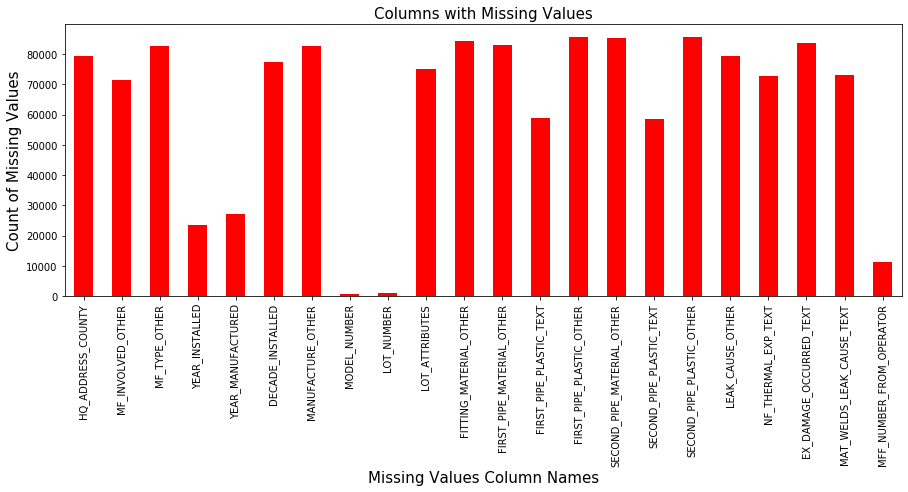

In [755]:
#Plot of missing values: 
print('Missing Values, Percentage:''\n',list(zip(df[missing_columns].isnull().sum(),df[missing_columns].isnull().sum()/df.shape[0])))
df[missing_columns].isnull().sum().plot('bar', figsize = (15,5), color = 'red')
_=plt.xlabel('Missing Values Column Names', fontsize = 15)
_=plt.ylabel('Count of Missing Values', fontsize = 15)
_=plt.title('Columns with Missing Values', fontsize = 15)


In [1076]:
# Functions for Exploring Missing Values (Future Use:) 
"""
(****for later****)
class MissingValues():
    def __init__(self, dataframe, missing_col, missing_percentage):
        self.dataframe = dataframe
        self.missing_col = missing_col
        self.missing_percentage = missing_percentage
"""        
        
    
def missing_values(dataframe, missing_col, missing_percentage):
    """Identifies missing values in the dataframe"""
    
    missing=dataframe[missing_col].isnull().sum()[(dataframe[missing_col].isnull().sum()/dataframe.shape[0] > missing_percentage) == True]
    return round(missing,2)


def percentage_missing(dataframe, missing_col, missing_percentage):
    """Identifies Percentage of missing values in the dataframe"""
    
    percent_missing = (dataframe[missing_col].isnull().sum()/dataframe.shape[0])[((dataframe[missing_col].isnull().sum()/dataframe[missing_col].shape[0])>missing_percentage) == True]
    return round (percent_missing,2)



def unique_value_counts_missing_columns(dataframe, missing_col, missing_percentage):
    """Returns count of unique values in the missing column.
       Where missing column is equal to i=df_null.col_name[df_null.null_yes==True]
       as calculated earlier in line 16
       """
    
    return dataframe[missing_columns].nunique()[(dataframe[missing_col].isnull().sum()/dataframe.shape[0] > missing_percentage) == True]                      


def number_missing_columns(dataframe, missing_percentage):
    """ Returns number of columns with missing values as we change missing percentage"""
    
    if (missing_percentage > 1) | (missing_percentage < 0):
        return('Please enter percentage value between 0 & 1')
    
    else:
        return len(dataframe.isnull().sum()[(dataframe.isnull().sum()/dataframe.shape[0] > missing_percentage) == True])


def missing_avg(dataframe, missing_col, missing_percentage):
    """Calculates average of missing values in the missing columns"""
    
    total_missing_percentage = sum(dataframe[missing_col].isnull().sum()/dataframe[missing_col].shape[0])
    length_missing_columns = len(dataframe[missing_col].isnull().sum()) 
    return round((total_missing_percentage/length_missing_columns),2)
              

def missing_dashboard(dataframe, missing_col, missing_percentage):
    missing_table = pd.concat([missing_values(dataframe, missing_col, missing_percentage), percentage_missing(dataframe, missing_col, missing_percentage), unique_value_counts_missing_columns(dataframe, missing_col, missing_percentage)], axis = 1)
    missing_table.columns = ['missing_values', 'missing_percentage', 'unique_values_in_missing_columns']
    print ('Average (base) Missing Percentage:',missing_avg(dataframe,missing_col, missing_percentage),'\n''Number of Missing Columns\n(Random with Missing Percentage):', number_missing_columns(dataframe, missing_percentage) )
    return missing_table 
    

In [1077]:
missing_dashboard(dataframe = df, 
                  missing_col= missing_columns, 
                  missing_percentage = 0.7)      

Average (base) Missing Percentage: 0.73 
Number of Missing Columns
(Random with Missing Percentage): 15


,missing_values,missing_percentage,unique_values_in_missing_columns
HQ_ADDRESS_COUNTY,79345,0.93,84
MF_INVOLVED_OTHER,71434,0.83,741
MF_TYPE_OTHER,82557,0.96,328
DECADE_INSTALLED,77247,0.90,10
MANUFACTURE_OTHER,82683,0.97,217
LOT_ATTRIBUTES,75017,0.88,738
FITTING_MATERIAL_OTHER,84411,0.99,58
FIRST_PIPE_MATERIAL_OTHER,82845,0.97,45
FIRST_PIPE_PLASTIC_OTHER,85557,1.00,31
SECOND_PIPE_MATERIAL_OTHER,85274,1.00,56


In [1135]:
#Exploring Unique Values in the Missing Columns:
for j,k in df[missing_columns].items():                     # j, k is the column name value in the missing columns 
    print("******",df[j].name,"*****" '\n', '\n', k.unique(), '\n')    

****** HQ_ADDRESS_COUNTY *****
 
 [nan 'US' 'BERKSHIRE' 'RICHARDSON' 'GREENWOOD' 'FAIRFIELD' 'GWINNETT'
 'MOBILE' 'BURLEIGH' 'DUPAGE' 'USA' 'ROANOKE' 'PAWNEE' 'HARDIN' 'SEVIER'
 'PULASKI' 'LEXINGTON' 'SAINT CLAIR' 'GREENE' 'TRUMBULL' 'JACKSON'
 'JOHNSON' 'PIMA' 'JEFFERSON' 'ARANSAS' 'FULTON' 'TULSA' 'COBB'
 'WORCESTER' 'MIDDLESEX' 'WASHINGTON' 'KINGS' 'SHELBY' 'BARTOW' 'KENT'
 'NUECES' 'CULLMAN' 'PITTSYLVANIA' 'NEW CASTLE' 'LAURENS' 'ESCAMBIA'
 'LAUDERDALE' 'ALACHUA' 'BERNALILLO' 'DALLAS' 'MADISON' 'ORANGE'
 'LAWRENCE' 'HENDERSON' 'MARSHALL' 'DOUGLAS' 'WAYNE' 'PLYMOUTH'
 'TREMPEALEAU' 'JASPER' 'KANAWHA' 'ERIE' 'OTOE' 'MONMOUTH' 'LICKING'
 'ONONDAGA' 'MULTNOMAH' 'WILLIAMS' 'SAN FRANCISCO' 'SANTA CLARA'
 'HILLSBOROUGH' 'DENVER' 'GASTON' 'NASH' 'ATLANTIC' 'CABELL' 'TRAVIS' 'TX'
 'DELAWARE' 'SAINT LOUIS CITY' 'UNION' 'TIPPAH' 'LUCAS' 'FORREST'
 'MILWAUKEE' 'HANCOCK' 'PENOBSCOT' 'RANCIN' 'COCONINO' 'TAZEWELL'] 

****** MF_INVOLVED_OTHER *****
 
 [nan 'CONTINENTAL' 'METFIT' 'COUPLING' 'CRIMP

In [129]:
#All Column Names
df.columns

Index(['DATAFILE_AS_OF', 'FORM_REV', 'OPERATOR_ID', 'REPORT_YEAR',
       'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER', 'REPORT_TYPE', 'REPORT_DATE',
       'FILING_DATE', 'OPERATOR_NAME', 'HQ_ADDRESS_STREET', 'HQ_ADDRESS_CITY',
       'HQ_ADDRESS_COUNTY', 'HQ_ADDRESS_STATE', 'HQ_ADDRESS_ZIP',
       'FAILURE_STATE', 'FAILURE_DATE', 'MF_INVOLVED_TEXT',
       'MF_INVOLVED_OTHER', 'MF_TYPE_TEXT', 'MF_TYPE_OTHER',
       'LEAK_LOCATION_A_TEXT', 'LEAK_LOCATION_B_TEXT', 'LEAK_LOCATION_C_TEXT',
       'YEAR_INSTALLED', 'YEAR_MANUFACTURED', 'DECADE_INSTALLED',
       'MANUFACTURE', 'MANUFACTURE_MAPPED', 'MANUFACTURE_OTHER',
       'MODEL_NUMBER', 'LOT_NUMBER', 'LOT_ATTRIBUTES', 'FITTING_MATERIAL_TEXT',
       'FITTING_MATERIAL_OTHER', 'FIRST_PIPE_NOMINAL_SIZE_TEXT',
       'FIRST_PIPE_UNIT_TEXT', 'FIRST_PIPE_MATERIAL_TEXT',
       'FIRST_PIPE_MATERIAL_OTHER', 'FIRST_PIPE_PLASTIC_TEXT',
       'FIRST_PIPE_PLASTIC_OTHER', 'SECOND_PIPE_NOMINAL_SIZE_TEXT',
       'SECOND_PIPE_UNIT_TEXT', 'SECOND_PIPE_

In [133]:
#Can we remove 'Manufacturer_other' with missing values?  
df[['MANUFACTURE', 'MANUFACTURE_MAPPED', 'MANUFACTURE_OTHER']].count()

MANUFACTURE           85558
MANUFACTURE_MAPPED    85611
MANUFACTURE_OTHER      2928
dtype: int64

In [136]:
#How many manufacturers are Unknowns? 
df['MANUFACTURE'][df['MANUFACTURE']=="UNAVAILABLE"].count()

3367

In [207]:
#Index of Unknown Manufacturers
ind=df['MANUFACTURE'][df['MANUFACTURE']=="UNAVAILABLE"].index
print(ind)

Int64Index([69951, 69953, 69954, 69960, 69970, 69976, 70118, 70130, 70133,
            70135,
            ...
            85585, 85586, 85587, 85588, 85589, 85590, 85591, 85592, 85594,
            85595],
           dtype='int64', length=3367)


In [206]:
#How many Unknown Manufacturers are known in Manufacturer_Other?
df.iloc[ind]['MANUFACTURE_OTHER'].count() 

#Result: None, hence manufacture_other can be dropped

0

In [218]:
#Top 10 manufacturers by state where leak occured: 
df.groupby(['HQ_ADDRESS_STATE', 'MANUFACTURE'])['MANUFACTURE'].count().sort_values(ascending=False).head(10)

HQ_ADDRESS_STATE  MANUFACTURE                                                
DC                UNKNOWN                                                        13945
TX                UNKNOWN                                                         4420
MI                UNKNOWN                                                         3851
IN                UNKNOWN                                                         3411
PA                KEROTEST                                                        3152
TX                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)     2963
PA                UNKNOWN                                                         2596
NY                DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)     2137
TN                UNKNOWN                                                         1984
IL                UNKNOWN                                                         1951
Name: MANUFACTURE, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


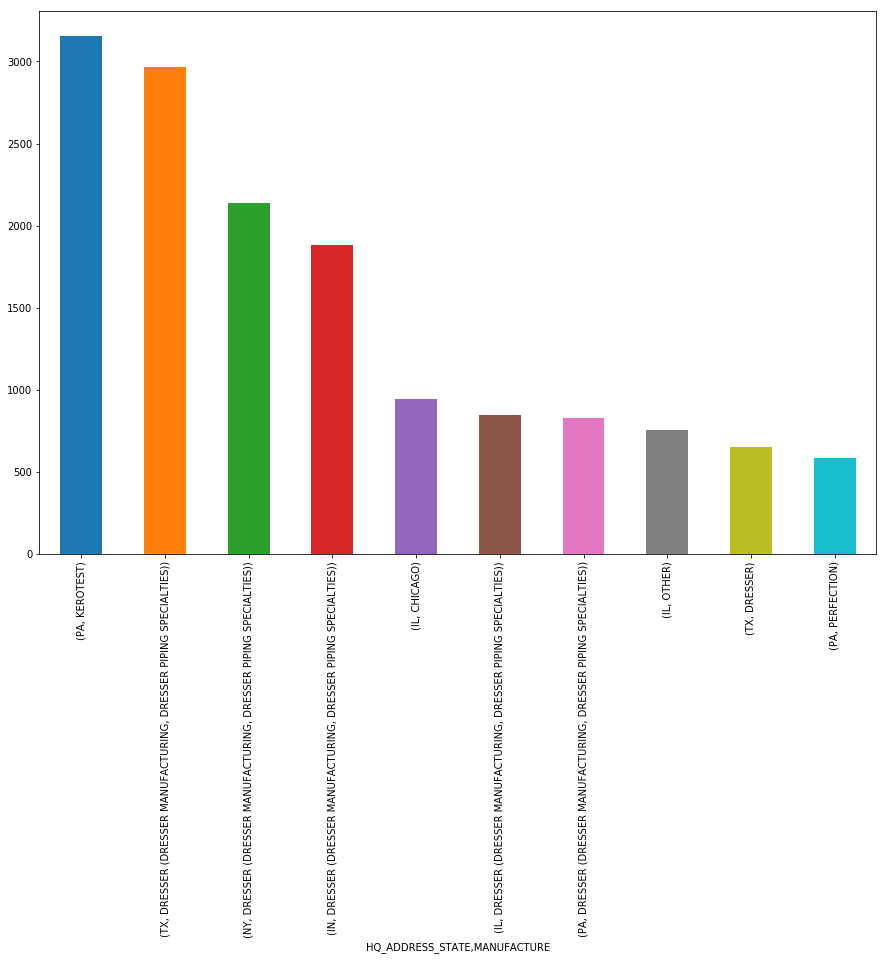

In [382]:
#Top 10 known manufacturers by state where leak occured? 

df_mfg_known=df[(df["MANUFACTURE"]!= "UNKNOWN") & (df["MANUFACTURE"]!="UNAVAILABLE")].groupby(['HQ_ADDRESS_STATE', 'MANUFACTURE'])['MANUFACTURE'].count().sort_values(ascending=False)
print(df_mfg_known.head(10).plot.bar(figsize = (15,10)))


In [396]:
#Manufacturer Summary per State:
df_mfg_summary=df_mfg_known.agg({'TOTAL MFG KNOW': 'sum', 'MAXIMUM MFG PER STATE': 'max', 'MINIMUM MFG PER STATE': 'min', 'AVERAGE MFG PER STATE': 'mean'})
df_mfg_summary.round(2)

TOTAL MFG KNOW           37849.00
MAXIMUM MFG PER STATE     3152.00
MINIMUM MFG PER STATE        1.00
AVERAGE MFG PER STATE       44.53
Name: MANUFACTURE, dtype: float64